# NLP for opportunities

This notebook is intended to analyze the data of the monthly webinars in the AESCULAP ACADEMY FOUNDATION MEXICO. This kind of data is totally unstructured and simple natural language from open responses at surveys. The main goal is to extract the most important words and phrases from the data and to create a word cloud to visualize the results.

Author : Axel Daniel Malváez Flores  
Date : July 13th, 2023  
Version : 2.0.0  

In [107]:
# Needed dependencies for the NLP
#!pip install -U pip setuptools wheel
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!python -m spacy download es_core_news_sm

In [108]:
# Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Remove accents
from unidecode import unidecode

sns.set_style('darkgrid')

## Reading Data

In order to read all the files with only having the extension ".xlsx", we just simply list all the files in the directory and then filter them by the extension.

In [109]:
super_path = '../Survey-Results'
file_names = os.listdir(super_path)

data_from_files = []
names = []

for file in file_names:
    if file.endswith('.xlsx'):
        names.append(file)
        data = pd.read_excel('../Survey-Results/' + file, sheet_name='NLP')
        data_from_files.append(data)

## Most Frequent Words in Most Liked Thing about the Webinar

This kind of content requires a natural language processing due to the size of the data and the complexity of the text. We will use the **SpaCy** library to process the text and extract the information we need.

In [110]:
# Selecting Data
liked, interests = data_from_files[0].iloc[:,0], data_from_files[0].iloc[:,1]

* Liked examples

In [111]:
liked

0      La explicación fue clara y sobre todo comprendida
1      Que las sesiones sean vía zoom, lo que me gust...
2                                                  Todo 
3                                              Temática 
4      El Dr. explicó muy detalladamente la fisiopato...
                             ...                        
232                                                 Todo
233                                  Toda la información
234                                              Cirugía
235                                                 Todo
236                       La experiencia de los ponentes
Name: ¿Qué es lo que más te gusta?, Length: 237, dtype: object

* Interest examples

In [112]:
interests

0                                        Cáncer de mama 
1      Todo lo que tenga que ver con cuestiones quirú...
2                                                    UCI
3                                         Onco Genetica 
4                                     CA cérvicouterino 
                             ...                        
232                                            Influenzq
233                                           Endoscopia
234                               Ginecología y Urologia
235                                   Gangrena Fournier 
236                     Medicina física y rehabilitación
Name: ¿Qué otros temas te interesarían?, Length: 237, dtype: object

Example for how using spaCy to extract the most important words from the text.

In [113]:
import spacy

# Load the Spanish model
nlp = spacy.load("es_core_news_sm")

# Sample text
text = "Spacy es una excelente librería para el procesamiento de lenguaje natural y dos números 1 y 34."

# Process the text
doc = nlp(text)

# Filter out stop words and print non-stop words
non_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num]
print(non_stop_words)

['Spacy', 'excelente', 'librería', 'procesamiento', 'lenguaje', 'natural', 'números']


### Preprocessing the text for each webinar & global

First we need to quit the stop words of the setences.

In [114]:
import spacy

nlp = spacy.load('es_core_news_sm')

def remove_stop_words(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num and not token.like_url and not token.like_email]
    return ' '.join(tokens)

#### Most Liked Thing

For every webinar we want to know what was the best and most liked thing about it:

* Individual

In [115]:
data_from_files[0]

,¿Qué es lo que más te gusta?,¿Qué otros temas te interesarían?
0,La explicación fue clara y sobre todo comprendida,Cáncer de mama
1,"Que las sesiones sean vía zoom, lo que me gust...",Todo lo que tenga que ver con cuestiones quirú...
2,Todo,UCI
3,Temática,Onco Genetica
4,El Dr. explicó muy detalladamente la fisiopato...,CA cérvicouterino
...,...,...
232,Todo,Influenzq
233,Toda la información,Endoscopia
234,Cirugía,Ginecología y Urologia
235,Todo,Gangrena Fournier


Most common words in Cáncer de Cabeza y Cuello26 de Julio de 2023.xlsx:
[('temas', 44), ('tema', 33), ('contenido', 21), ('excelente', 16), ('ponentes', 14), ('dominio', 10), ('experiencia', 8), ('información', 8), ('conocimiento', 7), ('gracias', 7)]



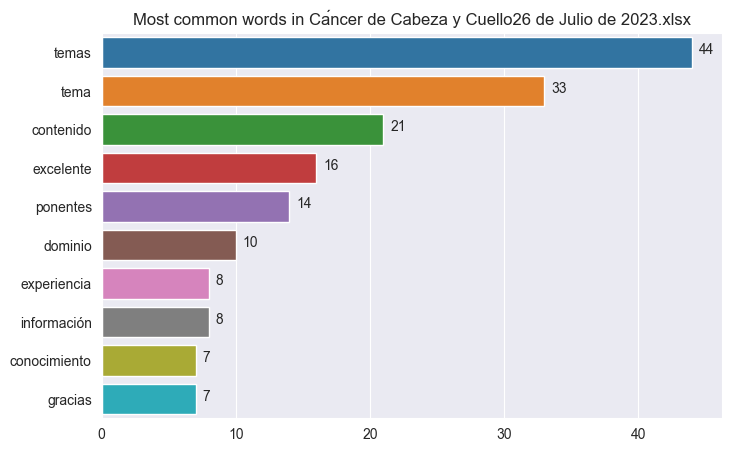

Most common words in Linfomas06 de Septiembre de 2023.xlsx:
[('tema', 25), ('temas', 20), ('excelente', 15), ('ponentes', 15), ('contenido', 14), ('ponente', 9), ('información', 8), ('ponencia', 8), ('forma', 7), ('experiencia', 6)]



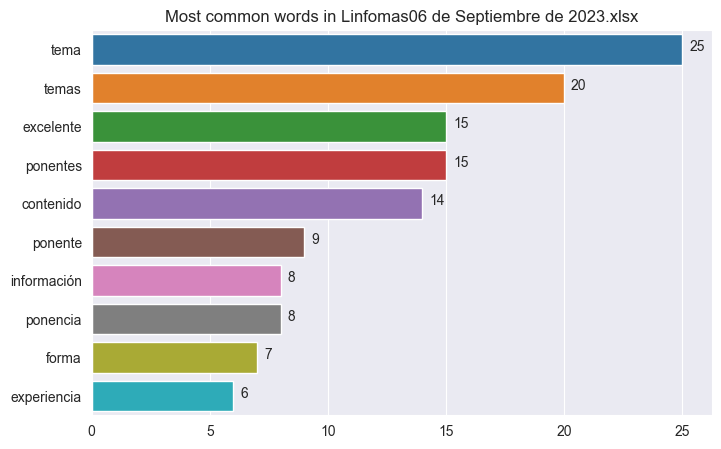

Most common words in Mieloma Múltiple30 de Agosto de 2023.xlsx:
[('tema', 30), ('temas', 23), ('contenido', 17), ('información', 15), ('excelente', 14), ('conocimiento', 11), ('ponentes', 9), ('ponencia', 7), ('forma', 7), ('dominio', 6)]



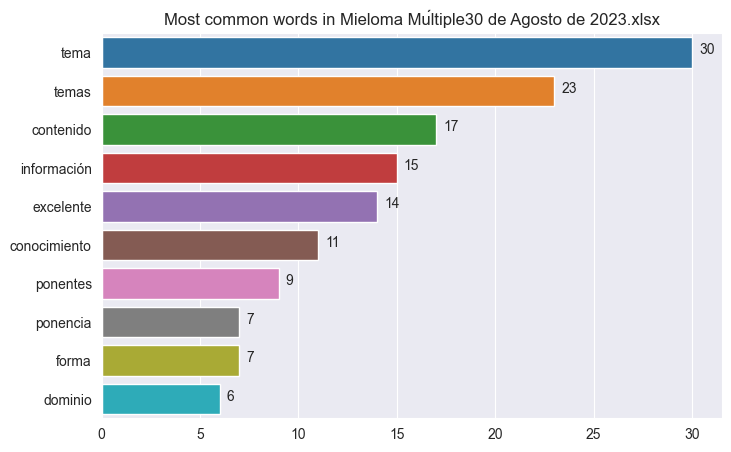

Most common words in Cáncer de estómago09 de Agosto de 2023.xlsx:
[('temas', 45), ('tema', 32), ('excelente', 22), ('contenido', 21), ('ponentes', 16), ('información', 14), ('organización', 12), ('experiencia', 12), ('dominio', 10), ('ponente', 10)]



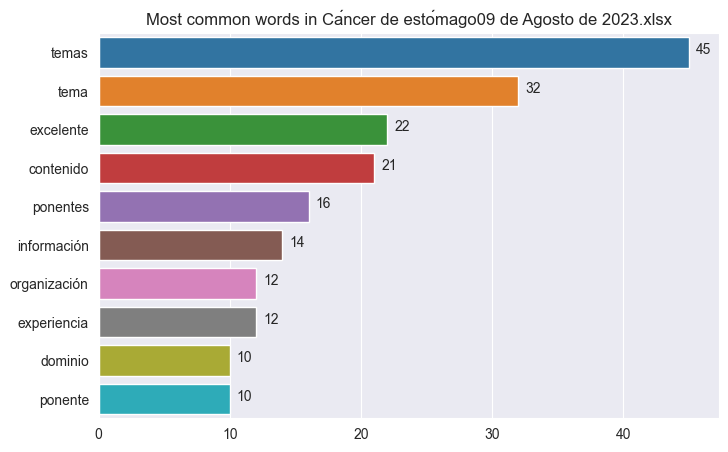

Most common words in Antecedentes Históricos del Desarrollo de la Especialidad en México19 de Octubre de 2023.xlsx:
[('tema', 24), ('temas', 16), ('contenido', 13), ('ponentes', 9), ('excelente', 7), ('interesante', 6), ('información', 6), ('cultura', 4), ('importancia', 4), ('especialidad', 4)]



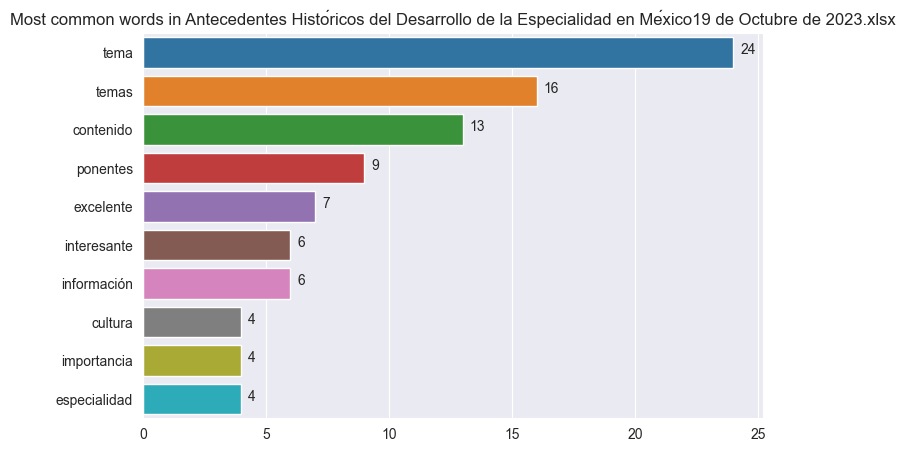

Most common words in Inteligencia Artificial y Cirugía04 Octubre de 2023.xlsx:
[('tema', 37), ('temas', 29), ('ponentes', 16), ('información', 11), ('excelente', 11), ('contenido', 10), ('interesante', 9), ('cirugía', 6), ('conocimiento', 5), ('dominio', 5)]



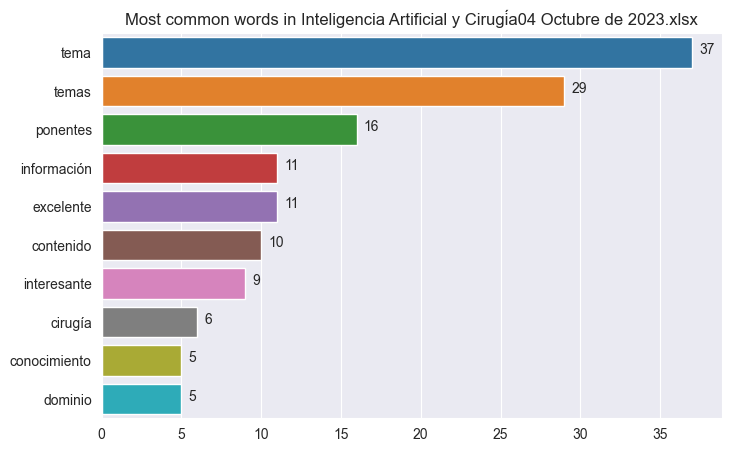

Most common words in De la teoría a la practica Abordajes Clínicos en la Nutrición31 de Agosto de 2023.xlsx:
[('tema', 36), ('temas', 31), ('excelente', 19), ('ponente', 18), ('contenido', 17), ('experiencia', 14), ('información', 14), ('ponentes', 13), ('dominio', 12), ('nutrición', 11)]



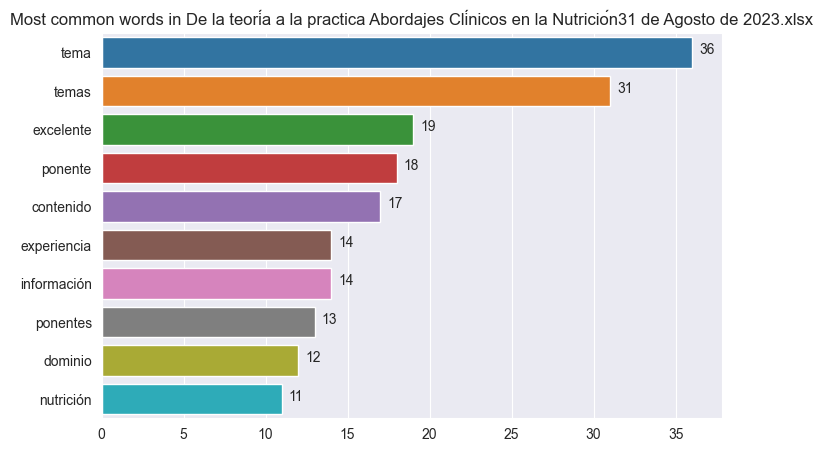

Most common words in ConversatorioInvestigación en Seguridad del Paciente03 de agosto de 2023.xlsx:
[('temas', 52), ('tema', 40), ('ponentes', 35), ('excelente', 22), ('contenido', 17), ('organización', 15), ('información', 12), ('horario', 10), ('dominio', 10), ('investigación', 7)]



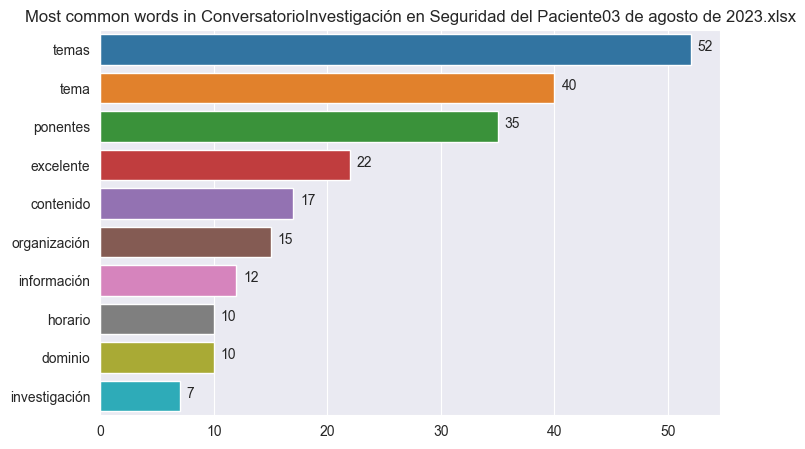

Most common words in Día Internacional del Sarcoma12 de Julio de 2023.xlsx:
[('temas', 36), ('tema', 32), ('contenido', 19), ('excelente', 18), ('ponentes', 13), ('organización', 9), ('información', 9), ('ponencia', 8), ('ponente', 7), ('dominio', 7)]



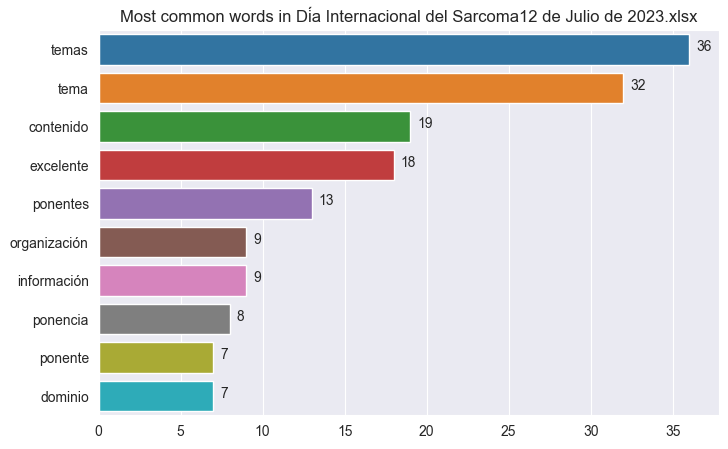

Most common words in Cáncer de mama18 de Octubre de 2023.xlsx:
[('tema', 38), ('temas', 23), ('contenido', 21), ('excelente', 20), ('información', 19), ('ponentes', 12), ('ponente', 10), ('ponencia', 9), ('claridad', 9), ('experiencia', 9)]



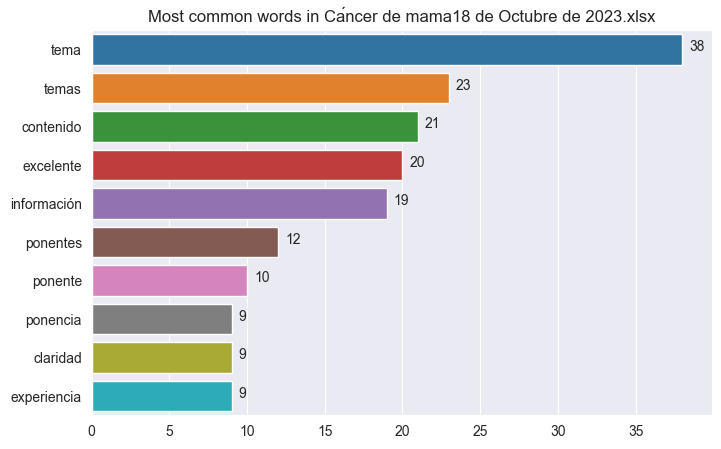

Most common words in Leucemias20 de Septiembre de 2023.xlsx:
[('temas', 28), ('tema', 24), ('excelente', 22), ('información', 17), ('contenido', 14), ('ponentes', 10), ('ponente', 9), ('organización', 7), ('explicación', 7), ('dominio', 7)]



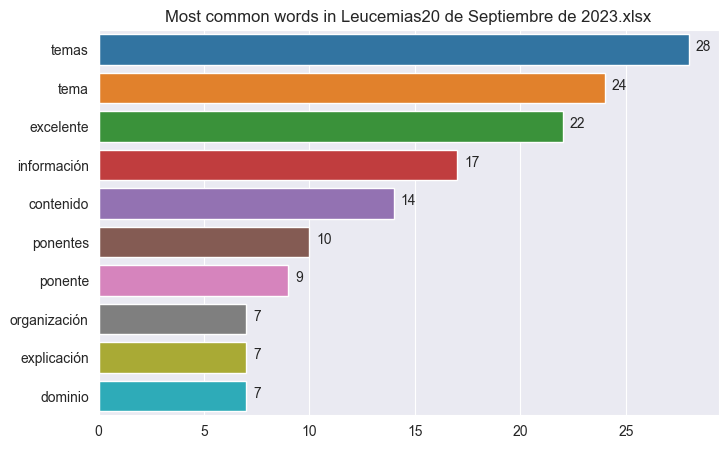

Most common words in Cáncer de Riñón23 de agosto de 2023.xlsx:
[('tema', 37), ('temas', 27), ('excelente', 21), ('ponentes', 16), ('contenido', 14), ('dominio', 14), ('información', 11), ('ponencia', 11), ('ponente', 9), ('gracias', 9)]



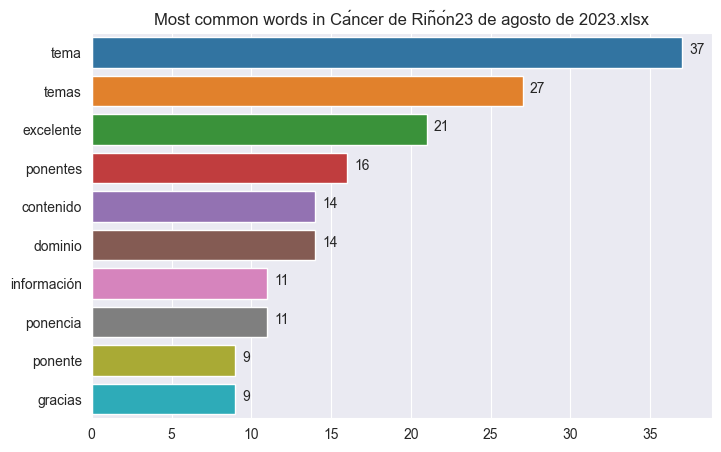

Most common words in Dolor de Rebote27 de Septiembre de 2023.xlsx:
[('tema', 37), ('temas', 33), ('excelente', 16), ('contenido', 15), ('ponentes', 11), ('dominio', 9), ('información', 9), ('organización', 8), ('presentación', 7), ('forma', 6)]



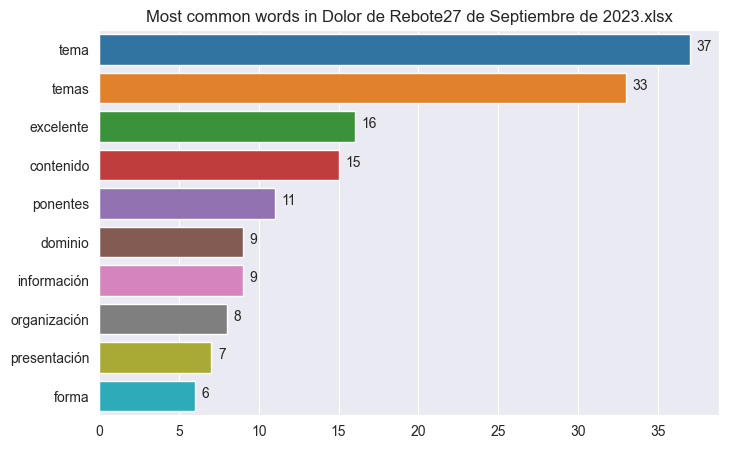

Most common words in Tumores Germinales13 de Septiembre de 2023.xlsx:
[('tema', 29), ('temas', 22), ('excelente', 19), ('contenido', 13), ('dominio', 12), ('organización', 10), ('ponencia', 8), ('ponentes', 8), ('información', 8), ('claridad', 6)]



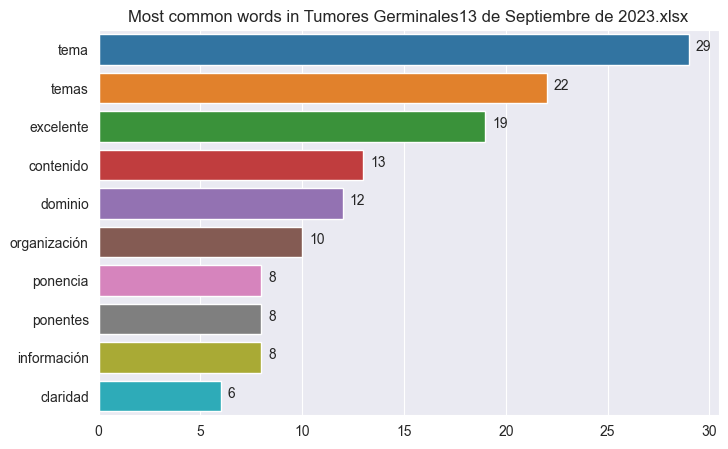

In [116]:
from collections import Counter

words_global = []

for i in range(len(data_from_files)):
    # Selecting Data
    liked = data_from_files[i].iloc[:,0]
    
    data_non_stop = []
    words = []
    
    data_non_stop = [remove_stop_words(op.lower()) for op in liked]
    words_documents = [x.split() for x in data_non_stop]
    words = [item for sublist in words_documents for item in sublist]
                
    words_global.extend(words)
        
    words_counted = Counter(words)
    most_common = words_counted.most_common(10)
    print(f"Most common words in {names[i]}:")
    print(most_common)
    print()
    
    plt.figure(figsize=(8, 5))
    sns.barplot(y=[x[0] for x in most_common], x=[x[1] for x in most_common])
    # Annotate the count for each bar
    for p in plt.gca().patches:
        plt.gca().annotate(int(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + 0.8), xytext=(5, 10), textcoords='offset points')
            
    plt.title(f"Most common words in {names[i]}")
    plt.show()

* Global

Text(0.5, 1.0, 'Most common words in all webinars')

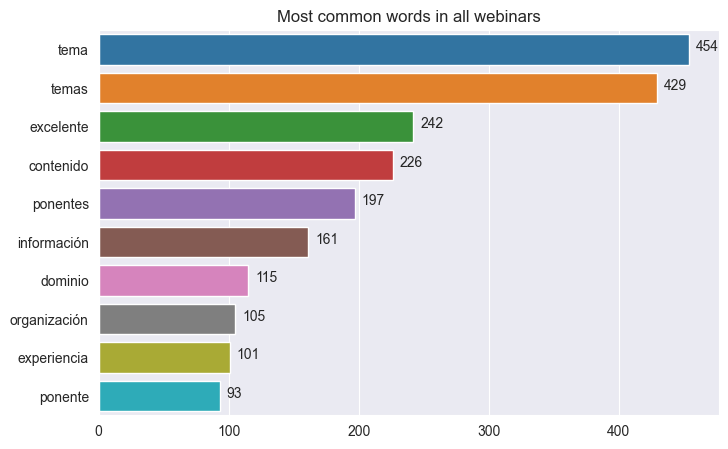

In [117]:
words_counted = Counter(words_global)
most_common = words_counted.most_common(10)
# print(f"Most common words in all webinars:")
# print(most_common)

plt.figure(figsize=(8, 5))
sns.barplot(y=[x[0] for x in most_common], x=[x[1] for x in most_common])
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + 0.8), xytext=(5, 10), textcoords='offset points')

plt.title(f"Most common words in all webinars")

## NLP for the recommended topics for the next webinars

El análisis de tópicos, que es una técnica probabilística que asigna a cada texto una distribución de tópicos, y a cada tópico una distribución de palabras. Así, se pueden descubrir los temas más relevantes en un conjunto de textos, y clasificarlos según su pertenencia a uno o más tópicos. Existen varios modelos de análisis de tópicos, como el LDA (Latent Dirichlet Allocation), el PLSA (Probabilistic Latent Semantic Analysis) o el NMF (Non-negative Matrix Factorization).

### Data Cleaning

In [118]:
interests = [ i for j in range(len(data_from_files)) for i in data_from_files[j].iloc[:,1].dropna() ]
print(f'Total interests: {len(interests)}')

Total interests: 2775


In [119]:
interests_non_stop = [unidecode(remove_stop_words(op.lower())) for op in interests]
interests_non_stop

['cancer mama',
 'cuestiones quirurgicas tecnicas actual mejora tratamientos intervenciones',
 'uci',
 'onco genetica',
 'ca cervicouterino',
 'genetica',
 'hemodialisis ulceras presion',
 'abordaje paciente quemado',
 'abordaje quirurgico craneotomia',
 'condiciones estres personal quirurgico',
 'cancer cervicouterino',
 'ulceras presion cuidado generales',
 'temas actualidad',
 'cirugias pacientes alergico latex',
 'uci qx hx',
 'hapatitis',
 'interesa tema influenza variantes',
 'temas relacionados tratamientos modernos frente cancer',
 'acciones enfermeria preventiva',
 'calidad',
 'sarcoma retroperitoneal',
 'vacunologia',
 'infarto cerebral',
 'salud',
 'salud',
 'heridas',
 'diabetes',
 'estomas pediatria',
 'cancer',
 'oncologia',
 '',
 'enfermedad alzheimer',
 'diabetes mellitus insuficiente renal virus papiloma humano',
 'salud emocional pacientes clinico-hospitalarios',
 'cancer triple negativo mama',
 'temas central esterilizacion relacion quirofano',
 'esquemas quimioterap

Spell checker

In [120]:
from spellchecker import SpellChecker
# Speller
spell = SpellChecker(language='es')

# Remover signos y caractéres especiales
interests_cleaned = [ str(i).replace("[^a-zA-ZáéíóúÁÉÍÓÚüÜñÑ]", " ").strip() for i in interests_non_stop]

interests_cleaned_and_corrected = []

# Correct spelling
for inter in interests_cleaned:
    words = inter.split()
    corrected_words = []
    for word in words:
        corrected_word = spell.correction(word)
        if word == 'covid' or word == 'onco':
            corrected_words.append(word)
            continue
        if word == 'obtetricas':
            corrected_words.append('obstétricas')
            continue
        if corrected_word != None:
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)
    corrected_text = ' '.join(corrected_words)
    interests_cleaned_and_corrected.append(corrected_text)

In [121]:
#Pre-procesamiento de los documentos
pre_data = pd.DataFrame({'interests':interests, 'interests_cleaned':interests_cleaned, 'interests_cleaned_and_corrected':interests_cleaned_and_corrected})
pre_data

,interests,interests_cleaned,interests_cleaned_and_corrected
0,Cáncer de mama,cancer mama,cancer mama
1,Todo lo que tenga que ver con cuestiones quirú...,cuestiones quirurgicas tecnicas actual mejora ...,cuestiones quirúrgicas tecnicas actual mejora ...
2,UCI,uci,uci
3,Onco Genetica,onco genetica,onco genetica
4,CA cérvicouterino,ca cervicouterino,ca cervicouterino
...,...,...,...
2770,Cirugía robotica,cirugia robotica,cirugia robótica
2771,Cáncer tiroides,cancer tiroides,cancer tiroides
2772,Nefrología,nefrologia,neurología
2773,Gracias,gracias,gracias


In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
                            max_features= 1000, # maximum number of words
                            max_df = 0.95,
                            min_df=2,
                            smooth_idf=True)

X = vectorizer.fit_transform(pre_data['interests_cleaned_and_corrected'])
print("Tamaño de la matriz TD-IDF: ", X.shape)

Tamaño de la matriz TD-IDF:  (2775, 611)


### Latent Semantic Analysis (LSA) for new topics

El análisis semántico latente (LSA, por las siglas en ingles de Latent Semantic Analysis) es un modelo estadístico que se utiliza para **determinar las relaciones** entre una colección de documentos y los términos presentes en estos *n* documentos a  partir de obtener las relaciones semánticas entre las palabras.

* Con la matriz de términos TF-IDF se comenzará a realizar el análisis semántico latente.

In [123]:
## Visualization of the terms
terminos = vectorizer.get_feature_names_out()
print("Total de términos:", len(terminos))

Total de términos: 611


#### Implementación del algoritmo

* Análisis de la versión truncada de SVD

In [124]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=6, #Dimensionalidad deseada de los datos de salida.
                         algorithm='randomized',
                         n_iter=100, random_state=122)
svd_model.fit_transform(X)

array([[ 6.97518639e-01, -1.00463477e-02, -8.66761966e-04,
        -2.10835822e-02,  1.56922772e-03, -2.82992409e-03],
       [ 3.08324174e-03,  3.25553416e-03,  2.45623478e-03,
         3.60097683e-03, -1.58495664e-04, -1.36627788e-03],
       [ 8.74585163e-06,  8.72908452e-04,  1.00341962e-03,
         1.60968713e-03, -2.33342539e-04, -1.10274106e-03],
       ...,
       [ 1.19994380e-04,  6.06908968e-03, -4.10154101e-03,
         1.00410744e-01,  9.93497893e-01, -2.66513509e-02],
       [ 1.86112983e-11,  3.54050425e-09,  5.20482748e-09,
         7.17370941e-09, -7.15792290e-10,  8.38473728e-09],
       [ 9.46767708e-07,  1.17134443e-04,  6.35008715e-05,
         1.07661461e-04,  5.30385717e-05, -3.27954891e-05]])

In [125]:
print("-- Analizando el tamaño de las matrices ---")
print("Sigma: ",svd_model.singular_values_.shape)
print("VT: ",svd_model.components_.shape)

-- Analizando el tamaño de las matrices ---
Sigma:  (6,)
VT:  (6, 611)


In [126]:
#Analizando las profundidades de model.components_
for topic_idx, topic in enumerate(svd_model.components_):
  print("Número de tópico:",topic_idx)
  print("topic:", len(topic))

Número de tópico: 0
topic: 611
Número de tópico: 1
topic: 611
Número de tópico: 2
topic: 611
Número de tópico: 3
topic: 611
Número de tópico: 4
topic: 611
Número de tópico: 5
topic: 611


In [158]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()

    if title == "TruncatedSVD":
      model = model.components_ # components_ es la matriz VT
    else:
      model = model
    for topic_idx, topic in enumerate(model):

        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1] #Returns the indices that sort a tensor along a given dimension in ascending order by value.
        #print("top_features_ind:",top_features_ind)

        top_features = [feature_names[i] for i in top_features_ind] #devuelve la palabra basada en el índice
        #print("top_features:",top_features)

        weights = topic[top_features_ind]
        #print("weights:",len(weights))

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        #ax.set_title(f"Topico: ", fontdict={"fontsize": 20}) #{topic_idx +1}
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=17)
        
    plt.subplots_adjust(top=0.98, bottom=0.04, wspace=0.23, hspace=0.15)

--- Visualizando tópicos con TruncatedSVD ---


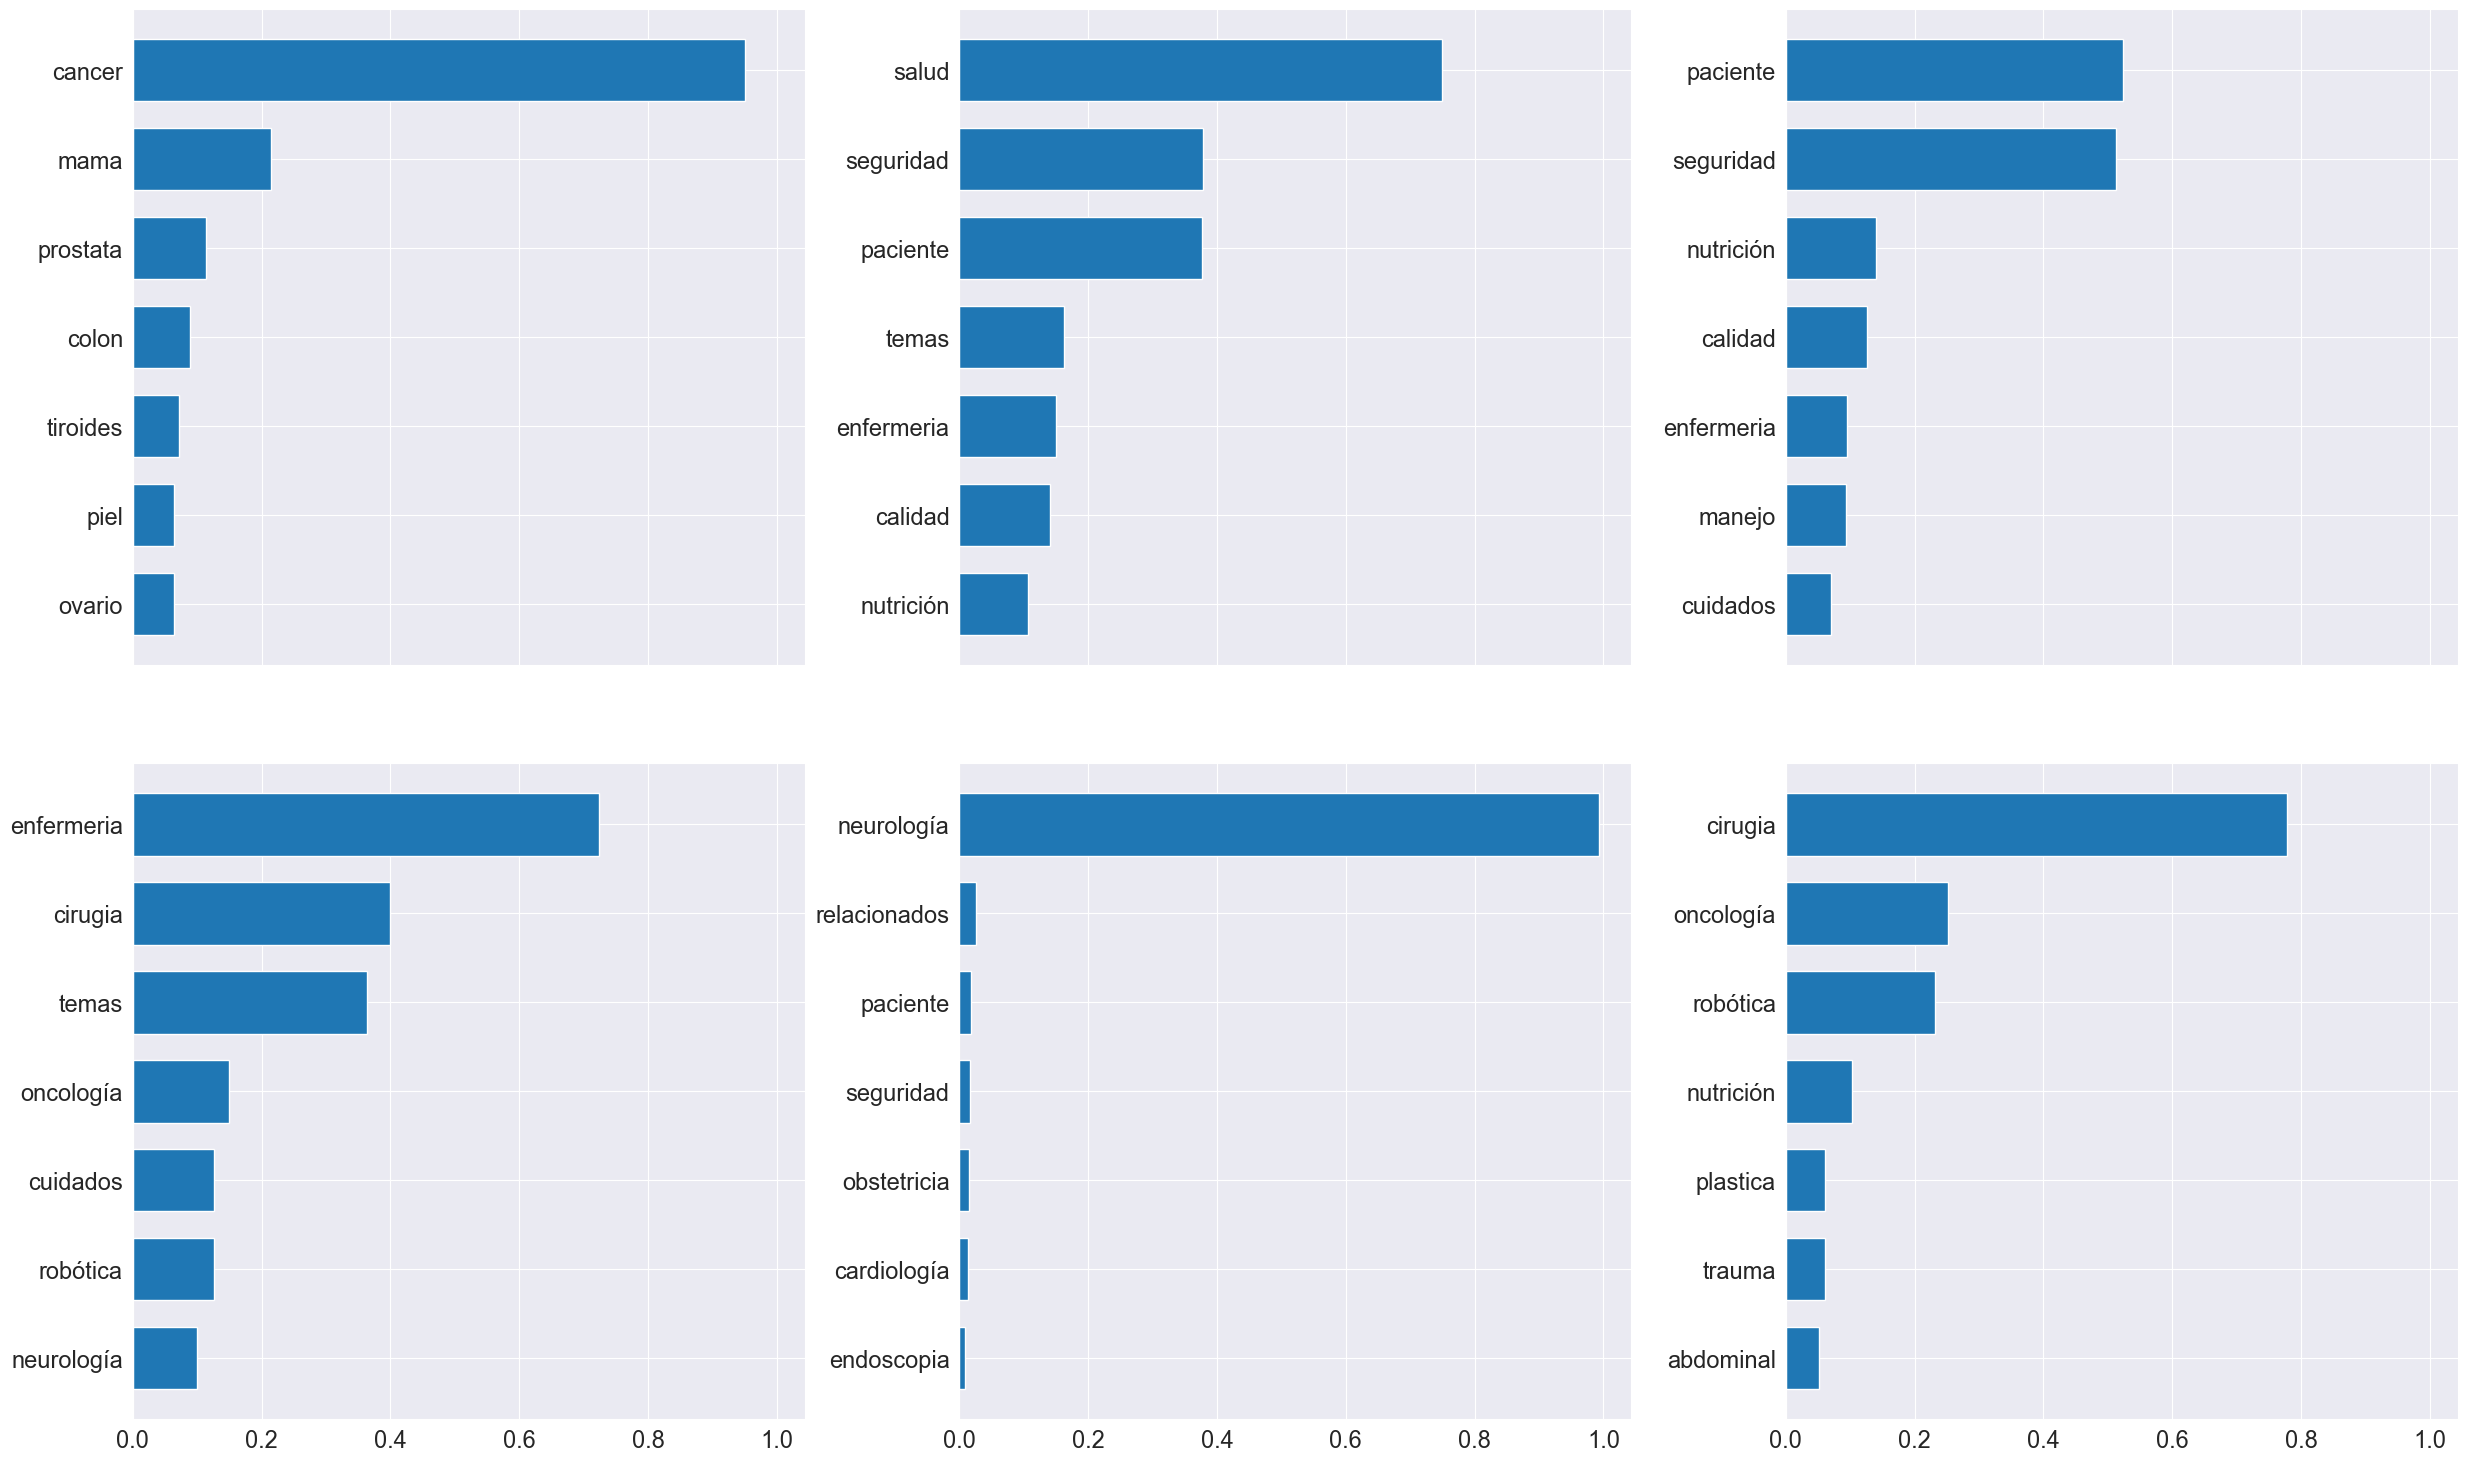

In [159]:
print("--- Visualizando tópicos con TruncatedSVD ---")
plot_top_words(svd_model, terminos, 7, "TruncatedSVD")
plt.savefig('TruncatedSVD.png', dpi=300, bbox_inches='tight')

### NMF

El análisis de tópicos usando la matriz de factorización no negativa (NMF, por sus siglas en inglés de Non-negative Matrix Factorization) es un algoritmo de aprendizaje no supervisado que se utiliza para la reducción de dimensionalidad y la extracción de características. El objetivo de este algoritmo es encontrar una representación de baja dimensión de los datos de entrada, en forma de una matriz de dos componentes no negativas, que se aproxime a la matriz de entrada.

In [129]:
from sklearn.decomposition import NMF

# Definición del modelo NMF con 2 tópicos
num_topics = 2
nmf_model = NMF(n_components=num_topics, random_state=1)

# Ajuste del modelo NMF a los datos TF-IDF
nmf_model.fit(X)

# Extracción de las matrices W y H
W = nmf_model.components_
H = nmf_model.transform(X)

# Palabras más importantes en cada tópico
n_words = 5
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(W):
    top_features_idx = topic.argsort()[:-n_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_idx]
    print(f"Tópico {topic_idx + 1}: {', '.join(top_features)}")

# Asignación de tópicos a los documentos
topic_assignments = np.argmax(H, axis=1)
for doc_idx, topic_idx in enumerate(topic_assignments):
    print(f"Documento {doc_idx + 1} pertenece al Tópico {topic_idx + 1}")

Tópico 1: cancer, mama, prostata, colon, tiroides
Tópico 2: salud, seguridad, paciente, temas, enfermeria
Documento 1 pertenece al Tópico 1
Documento 2 pertenece al Tópico 2
Documento 3 pertenece al Tópico 2
Documento 4 pertenece al Tópico 2
Documento 5 pertenece al Tópico 1
Documento 6 pertenece al Tópico 2
Documento 7 pertenece al Tópico 2
Documento 8 pertenece al Tópico 2
Documento 9 pertenece al Tópico 2
Documento 10 pertenece al Tópico 2
Documento 11 pertenece al Tópico 1
Documento 12 pertenece al Tópico 2
Documento 13 pertenece al Tópico 2
Documento 14 pertenece al Tópico 2
Documento 15 pertenece al Tópico 2
Documento 16 pertenece al Tópico 2
Documento 17 pertenece al Tópico 1
Documento 18 pertenece al Tópico 1
Documento 19 pertenece al Tópico 2
Documento 20 pertenece al Tópico 2
Documento 21 pertenece al Tópico 1
Documento 22 pertenece al Tópico 1
Documento 23 pertenece al Tópico 1
Documento 24 pertenece al Tópico 2
Documento 25 pertenece al Tópico 2
Documento 26 pertenece al Tó